# Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn. model_selection import GridSearchCV

# Reading file

In [2]:
data=pd.read_csv('C:/Users/GREAT LEARNING/Downloads/DSE/Case_Study/Parkinson_Disease_Prediction/Input/parkinson.csv')

In [3]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.shape

(195, 24)

# Null Values

In [5]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [7]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Splitting X and Y

In [8]:
data.drop(columns=['name'],inplace=True)
x= data.drop(columns=['status'])  # independant variables (inputs)
y=data['status']   # dependant varaibles(output)

In [9]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Class Distribution

1    147
0     48
Name: status, dtype: int64


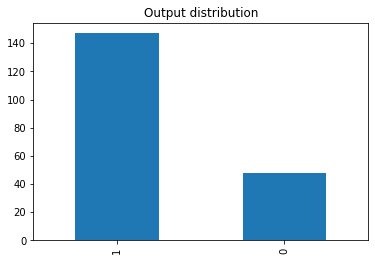

In [11]:
y_dist=y.value_counts()
print(y_dist)
y_dist.plot(kind='bar')
plt.title('Output distribution')

plt.show()

In [12]:
y_dist/len(y)

1    0.753846
0    0.246154
Name: status, dtype: float64

# Correlation

In [89]:
data.corr()>0.7


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MDVP:Fhi(Hz),False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MDVP:Flo(Hz),False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MDVP:Jitter(%),False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,True
MDVP:Jitter(Abs),False,False,False,True,True,True,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,True
MDVP:RAP,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
MDVP:PPQ,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,False,False,True
Jitter:DDP,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
MDVP:Shimmer,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
MDVP:Shimmer(dB),False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False


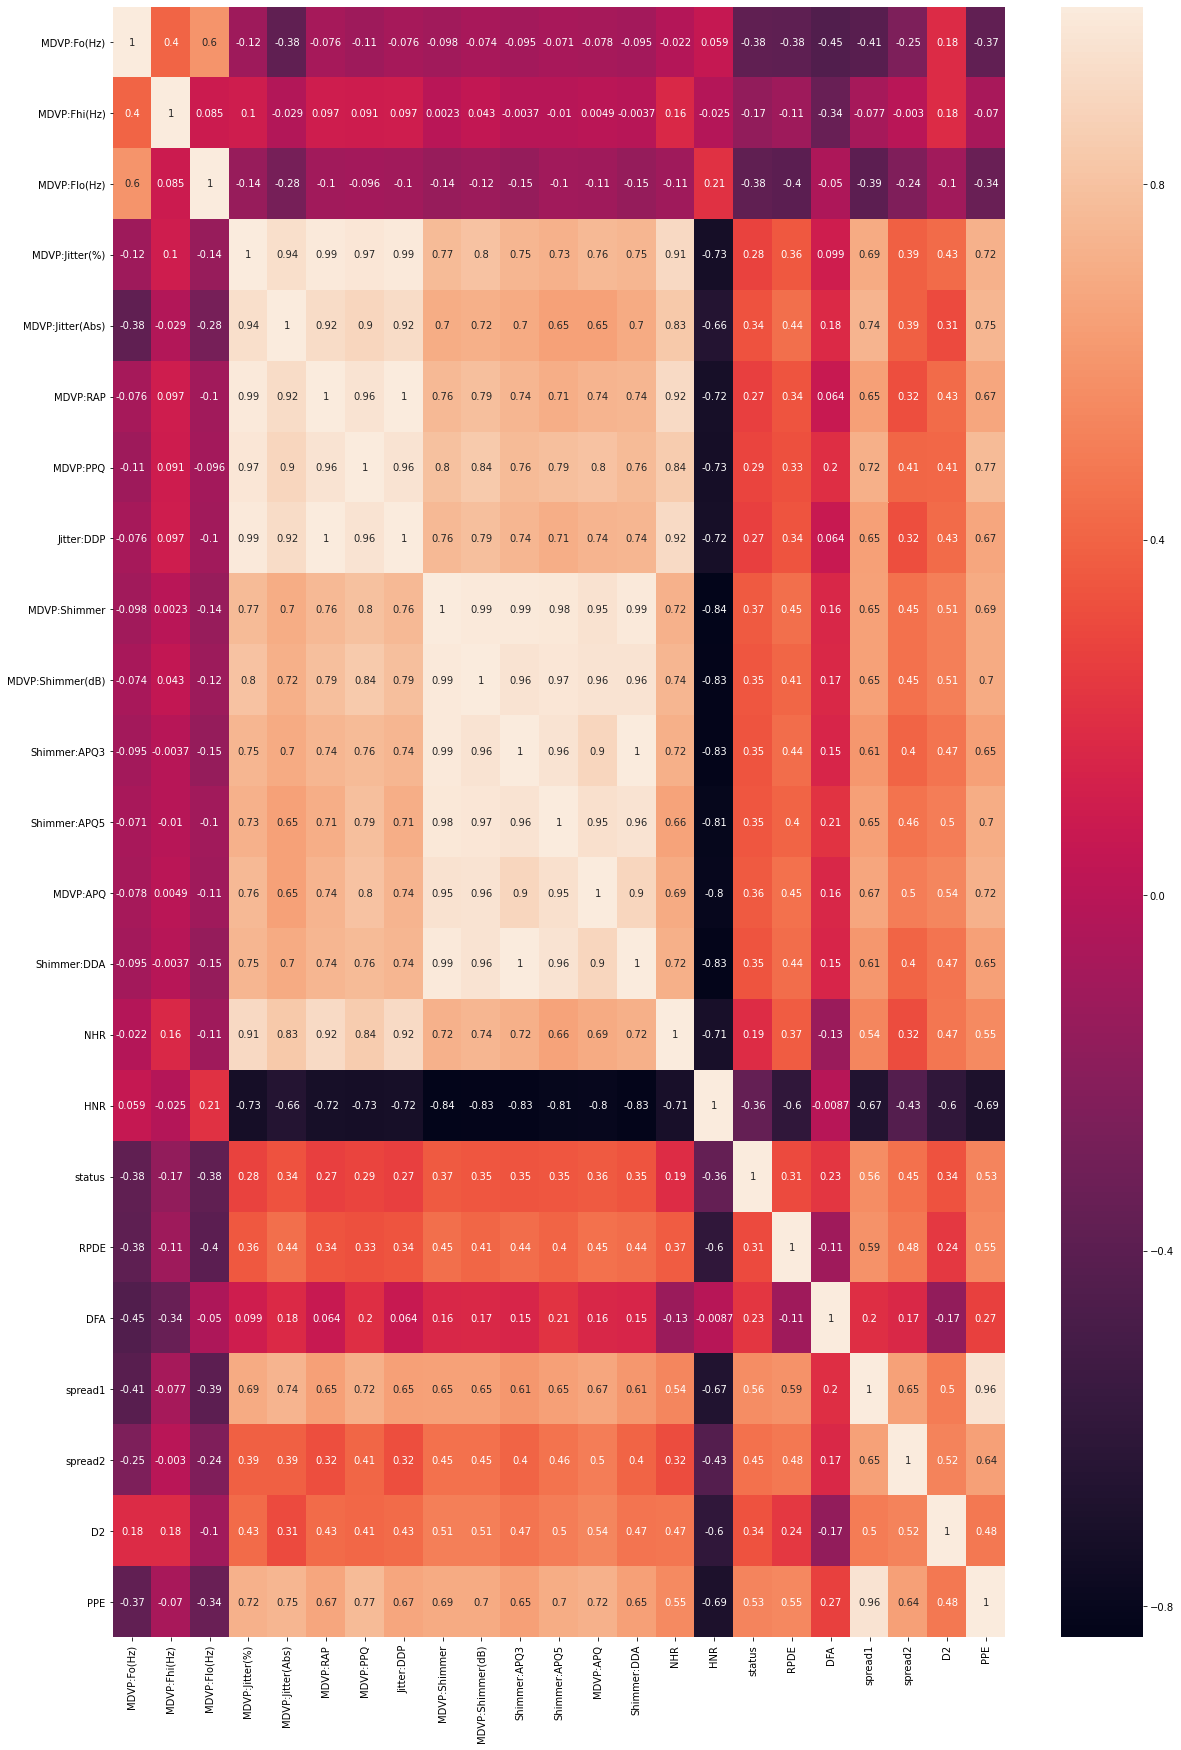

In [90]:
plt.figure(figsize=(20,30))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [91]:
status_low_corr=['MDVP:Fhi(Hz)','NHR','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',]

# Since the status is numerical and categical data. So i choose lowsest correlated featurs
# If output is non numerical, select all the features

### Pair Plot

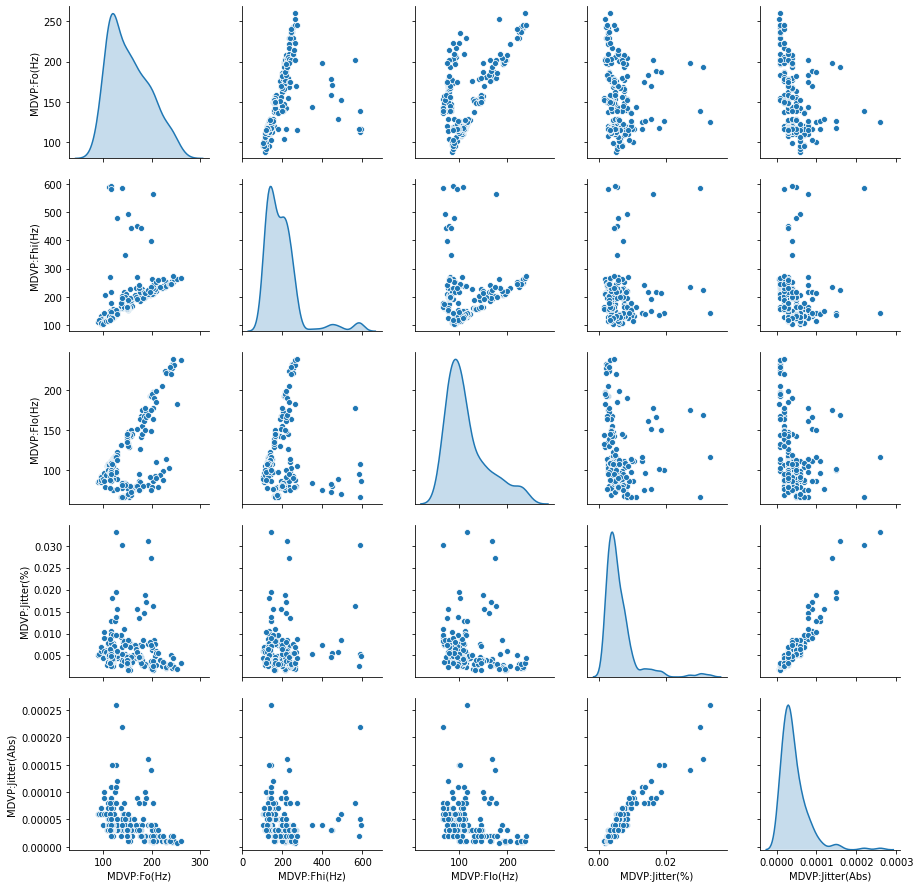

In [125]:
sns.pairplot(data=data.iloc[:,0:5],diag_kind='kde')
plt.show()

## Statistical Tests

In [15]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [16]:
data_0=data[data['status']==0]  # no parkinson
data_1=data[data['status']==1] #  parkinson

### MDVP:Fhi(Hz):

<AxesSubplot:>

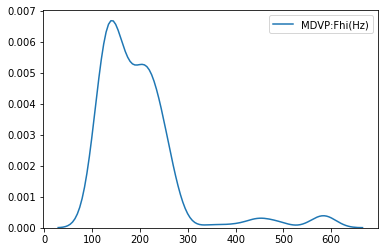

In [17]:
sns.kdeplot(x['MDVP:Fhi(Hz)'])

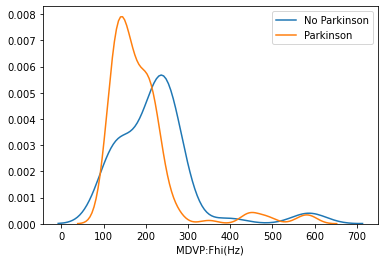

In [18]:
sns.distplot(data_0['MDVP:Fhi(Hz)'],label='No Parkinson',hist=False)
sns.distplot(data_1['MDVP:Fhi(Hz)'],label='Parkinson',hist=False)
plt.legend()
plt.show()

In [14]:
from scipy.stats import stats

In [22]:
stats.ttest_ind(data_0['MDVP:Fhi(Hz)'],data_1['MDVP:Fhi(Hz)'],equal_var=True) #default

Ttest_indResult(statistic=2.3405672508312887, pvalue=0.02027566914279856)

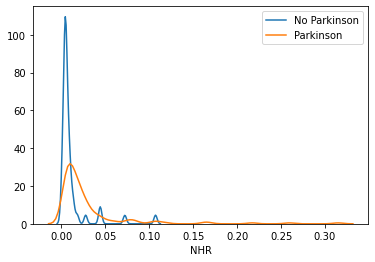

In [21]:
sns.distplot(data_0['NHR'],label='No Parkinson',hist=False)
sns.distplot(data_1['NHR'],label='Parkinson',hist=False)
plt.legend()
plt.show()

In [102]:
shapiro(x['MDVP:Fhi(Hz)'])

(0.7228380441665649, 9.295729992417817e-18)

In [103]:
x['MDVP:Fhi(Hz)'].skew()

2.542145997588399

In [105]:
# Ho: mean of data_0['MDVP:Fhi(Hz)'] = mean of data_1['MDVP:Fhi(Hz)']   # no effect of col in dis
# Ha: Ho: mean of data_0['MDVP:Fhi(Hz)'] != mean of data_1['MDVP:Fhi(Hz)'] # effect of col in dis

mannwhitneyu(data_0['MDVP:Fhi(Hz)'],data_1['MDVP:Fhi(Hz)'])

MannwhitneyuResult(statistic=2294.0, pvalue=0.00013981351194737522)

In [106]:
# also checking the ttest
ttest_ind(data_0['MDVP:Fhi(Hz)'],data_1['MDVP:Fhi(Hz)'])  # not appropriate

Ttest_indResult(statistic=2.3405672508312887, pvalue=0.020275669142798557)

### NHR column:

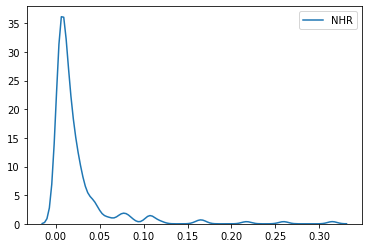

In [107]:
sns.kdeplot(x['NHR'])

In [108]:
x['NHR'].skew()

4.22070912913906

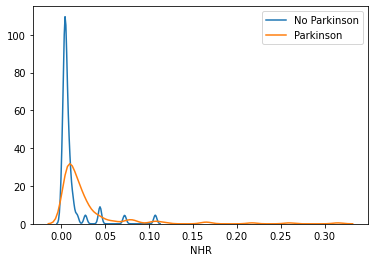

In [49]:
sns.distplot(data_0['NHR'],label='No Parkinson',hist=False)
sns.distplot(data_1['NHR'],label='Parkinson',hist=False)
plt.legend()
plt.show()

In [109]:
mannwhitneyu(data_0['NHR'],data_1['NHR'])

MannwhitneyuResult(statistic=1600.5, pvalue=6.881212446333277e-09)

In [48]:
ttest_ind(data_0['NHR'],data_1['NHR']) # not appropriate

Ttest_indResult(statistic=-2.6801622570065144, pvalue=0.007994850518899727)

### For all columns:

In [23]:
for col in x.columns:
    norm=shapiro(x[col])[1]
    if norm>0.05:   # normal
        pval=ttest_ind(data_0[col],data_1[col])[1]
        if pval<0.05:
            print(col,'Ttest:',pval,"Significant")
        else:
             print(col,'Ttest:',pval,"InSignificant")
    else:
        pval=mannwhitneyu(data_0[col],data_1[col])[1]
        if pval<0.05:
            print(col,'Manwhitneyutest:',pval,"Significant")
        else:
             print(col,'Manwhitneyutest:',pval,"InSignificant")

MDVP:Fo(Hz) Manwhitneyutest: 1.5257518922120146e-05 Significant
MDVP:Fhi(Hz) Manwhitneyutest: 0.00013981351194737522 Significant
MDVP:Flo(Hz) Manwhitneyutest: 2.07566028788258e-05 Significant
MDVP:Jitter(%) Manwhitneyutest: 3.948963597468021e-09 Significant
MDVP:Jitter(Abs) Manwhitneyutest: 6.378696292805234e-10 Significant
MDVP:RAP Manwhitneyutest: 4.344684901872679e-09 Significant
MDVP:PPQ Manwhitneyutest: 1.2007468217089975e-09 Significant
Jitter:DDP Manwhitneyutest: 4.090031255884936e-09 Significant
MDVP:Shimmer Manwhitneyutest: 2.1123700005608245e-09 Significant
MDVP:Shimmer(dB) Manwhitneyutest: 1.571727292965365e-09 Significant
Shimmer:APQ3 Manwhitneyutest: 5.955519667195475e-08 Significant
Shimmer:APQ5 Manwhitneyutest: 1.020090231049429e-08 Significant
MDVP:APQ Manwhitneyutest: 6.346342074610555e-12 Significant
Shimmer:DDA Manwhitneyutest: 6.05262494689413e-08 Significant
NHR Manwhitneyutest: 6.881212446333277e-09 Significant
HNR Manwhitneyutest: 3.820934740028864e-07 Significan

In [ ]:
stats.pearsonr()

# Train Test Split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


# Scaling

In [25]:
std_scl=StandardScaler()
x_train_scaled= std_scl.fit_transform(x_train)   # point estimates
x_test_scaled=std_scl.transform(x_test)

In [26]:
x_scaled=StandardScaler().fit_transform(x)  # range estimates

In [27]:
#x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0)

# Logistic Regression

In [28]:
log_reg_model=LogisticRegression()
log_reg_model.fit(x_train_scaled,y_train)
y_pred=log_reg_model.predict(x_test_scaled)
print('Train score:',log_reg_model.score(x_train_scaled,y_train))
print('Test scoreL',log_reg_model.score(x_test_scaled,y_test))

Train score: 0.8676470588235294
Test scoreL 0.8813559322033898


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_pred,y_test)

0.8813559322033898